In [136]:
# Normal Distribution Formula

# Xnew = x - xmin/xmax - xmin

# A standard normal distribution is a normal distribution with mean 0 and standard deviation 1

# Xnew = x- mean/std

# Null Hupothesis

# Alternate Hypothesis

# Degree of Freedom

In [34]:
from scipy import stats
from statsmodels.stats import weightstats as stests
import numpy as np
import pandas as pd

In [24]:
# If we observe a large p values then we cannot reject the null hypothesis
# If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis 

### One Sample T Test

In [ ]:
# Does the average age of Gujarati voters differ from that of the population?

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

np.random.seed(6)

population_ages=stats.poisson.rvs(loc=18,mu=30,size=150000)

gujarat_ages=stats.poisson.rvs(loc=18,mu=30,size=30)
population_ages.mean()

In [ ]:
gujarat_ages.mean()

In [ ]:
stats.ttest_1samp(a=gujarat_ages,popmean=population_ages.mean())

In [ ]:
# we will accept the null hypothesis that there is no significant difference in the mean

### Second Example

In [19]:
np.random.seed(7654567)  # fix seed to get the same result
rvs = stats.norm.rvs(loc=5, scale=10, size=(50,2)) # Creating a normal distribution of mean 5 and std 10
print(stats.ttest_1samp(rvs,5.0)) # Testing with the known population mean of 5
print(stats.ttest_1samp(rvs,0.0)) # Testing with the known population mean of 0

Ttest_1sampResult(statistic=array([-0.68014479, -0.04323899]), pvalue=array([0.49961383, 0.96568674]))
Ttest_1sampResult(statistic=array([2.77025808, 4.11038784]), pvalue=array([0.00789095, 0.00014999]))


### Paird T Test 

In [ ]:
# When you want to check how different samples from the same group are, you can go for a paired T-test

In [ ]:
np.random.seed(11)
before=stats.norm.rvs(scale=30,loc=250,size=100)
after=before+stats.norm.rvs(scale=5,loc=-1.25,size=100)
weight_df=pd.DataFrame({"weight_before":before,
                         "weight_after":after,
                         "weight_change":after-before})

In [ ]:
weight_df.head()

In [ ]:
weight_df.describe()

In [ ]:
before.mean()

In [ ]:
after.mean()

In [ ]:
stats.ttest_rel(a=before,b=after)

In [ ]:
# Since the p value is less than 0.05 we will reject the null hypothesis, there is a significant change in the samples

### Second Example

In [23]:
np.random.seed(12345678)
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = (stats.norm.rvs(loc=5,scale=10,size=500) + stats.norm.rvs(scale=0.2,size=500))
rvs3 = (stats.norm.rvs(loc=8,scale=10,size=500) + stats.norm.rvs(scale=0.2,size=500))
print(stats.ttest_rel(rvs1,rvs2))
print(stats.ttest_rel(rvs1,rvs3))

# Examples for the use are scores of the same set of student in different exams

Ttest_relResult(statistic=0.24101764965300979, pvalue=0.8096404344581155)
Ttest_relResult(statistic=-3.9995108708727924, pvalue=7.308240219166128e-05)


### Independet T Test 

In [ ]:
# Such a test tells us whether two data samples have different means

In [ ]:
np.random.seed(12)
maharashtra_ages=stats.poisson.rvs(loc=18,mu=33,size=30)
maharashtra_ages.mean()

In [ ]:
maharashtra_ages

In [ ]:
maharashtra_ages.mean()

In [ ]:
gujarat_ages.mean()

In [ ]:
stats.ttest_ind(a=gujarat_ages,b=maharashtra_ages)

In [ ]:
# Since the p value is less than 0.05 we will reject the null hypothesis, they both have different samples

### Second Example

In [31]:
np.random.seed(12345678)
rvs1 = stats.norm.rvs(loc=5,scale=10,size=500) # Test with sample with identical means
rvs2 = stats.norm.rvs(loc=5,scale=10,size=500) 
print(stats.ttest_ind(rvs1,rvs2))
print(stats.ttest_ind(rvs1,rvs2, equal_var = False))

rvs3 = stats.norm.rvs(loc=5, scale=20, size=500) # ttest_ind underestimates p for unequal variances
print(stats.ttest_ind(rvs1, rvs3))

rvs4 = stats.norm.rvs(loc=8, scale=20, size=100)
print(stats.ttest_ind(rvs1, rvs4))

Ttest_indResult(statistic=0.26833823296238857, pvalue=0.788494433695651)
Ttest_indResult(statistic=0.26833823296238857, pvalue=0.7884945274950106)
Ttest_indResult(statistic=-0.46580283298287956, pvalue=0.6414582741343561)
Ttest_indResult(statistic=-3.386962586143801, pvalue=0.0007531032817270578)


### One Sample Z Test

In [ ]:
from statsmodels.stats.weightstats import ztest
import numpy as np

In [ ]:
data=np.random.normal(loc=3.4,scale=0.1,size=100)
data.mean()

In [ ]:
singleValue=3.3

In [ ]:
testResult=ztest(data,value=singleValue)
testResult

In [ ]:
pValue=testResult[1]
print("p-value is: "+str(pValue))
print("")

### Second Example

In [63]:
data ={'bp_after': [10,12,13,12,11,12,15,18,12,13],'bp_before' : [11,13,14,13,12,11,18,18,16,15]}

datas = pd.DataFrame(data)
ztest ,pval = stests.ztest(datas['bp_before'], x2=None, value=16)
print(float(pval))

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.02090163547951763
reject null hypothesis


### Two Sample Z Test 

In [62]:
ztest ,pval1 = stests.ztest(datas['bp_before'], x2=datas['bp_after'], value=0,alternative='two-sided')
print(float(pval1))

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.23206348890203465
accept null hypothesis


In [1]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count = np.array([5, 12])
nobs = np.array([83, 99])
stat, pval = proportions_ztest(count, nobs)
print('P Value is {0:0.3f}'.format(pval))

P Value is 0.159


In [ ]:
# Paired-samples t tests compare scores on two different variables but for the same group of cases; 
''' The average score of subjects on the posttest is different than the average of those same
subjects on the pretest '''
'''Graduates had higher average salaries 10 years after graduation than they had 5 years after
graduation.'''


# independent-samples t tests compare scores on the same variable but for two different groups of cases
'''Catholic women on an average have more children than Protestant women '''
'''The mean years of schooling of Republicans are different than the mean years of schooling
of Democrats'''

### ANOVA (F-TEST) 

In [65]:
# F = Between group variability / Within group variability
# One Way F-test(Anova) :- It tell whether two or more groups are similar or not based on their mean similarity and f-score

In [ ]:
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
import matplotlib.pyplot as plt

# Loading data
df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/difficile.csv")
df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)
    
# Gettin summary statistics
rp.summary_cont(df['libido'])

In [ ]:
df.head()

In [ ]:
rp.summary_cont(df['libido'].groupby(df['dose']))

In [ ]:
stats.f_oneway(df['libido'][df['dose'] == 'high'], 
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'placebo'])

In [ ]:
# The F-statistic and the p-value is indicating that there is an overall significant effect of 
# medication on libido.

### Second Example 

In [82]:
data = {'Weight': [4.71,5.35,5.18,6.11,4.5,5.17,5.33,4.41,3.59,5.87],'group':['ctrl','trt1','trt2','ctrl','ctrl','trt1','trt1','ctrl','trt2','trt2']}
data = pd.DataFrame(data)
df_anova = data[['Weight','group']]

grps = pd.unique(df_anova.group.values)
d_data = {grp:df_anova['Weight'][df_anova.group == grp] for grp in grps}

F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])
print("p-value for significance is: ", p)

p-value for significance is:  0.8049243008499225


### Two Way ANOVA

In [ ]:
import numpy as np
import pandas as pd
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/tooth_growth_csv')
df = data[0:10]

formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols(formula, data).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)

In [ ]:
data.head()

In [2]:
# In a Two-Way ANOVA, there are two variables to consider. The question is whether our variable in question
# (tooth length len) is related to the two other variables supp and dose by the equation: len=supp+dose+supp×dose

### Chi Square Test 

In [11]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import scipy.stats as stats
print(chisquare([16, 18, 16, 14, 12, 12])) # When just f_obs is given, it is assumed that the expected frequencies 
# are uniform and given by the mean of the observed frequencies.

print(chisquare([16, 18, 16, 13, 14, 14], f_exp=[16, 16, 16, 16, 16, 16])) # With f_exp the expected frequencies can be given

Power_divergenceResult(statistic=2.0, pvalue=0.8491450360846096)
Power_divergenceResult(statistic=1.3125, pvalue=0.933640196971634)


### Second Example 

In [12]:
import numpy as np
a1 = [6, 4, 5, 10]
a2 = [8, 5, 3, 3]
a3 = [5, 4, 8, 4]
a4 = [4, 11, 7, 13]
a5 = [5, 8, 7, 6]
a6 = [7, 3, 5, 9]
dice = np.array([a1, a2, a3, a4, a5, a6])

In [13]:
dice

array([[ 6,  4,  5, 10],
       [ 8,  5,  3,  3],
       [ 5,  4,  8,  4],
       [ 4, 11,  7, 13],
       [ 5,  8,  7,  6],
       [ 7,  3,  5,  9]])

In [14]:
chi2_contingency(dice)

(16.490612061288754,
 0.35021521809742745,
 15,
 array([[ 5.83333333,  5.83333333,  5.83333333,  7.5       ],
        [ 4.43333333,  4.43333333,  4.43333333,  5.7       ],
        [ 4.9       ,  4.9       ,  4.9       ,  6.3       ],
        [ 8.16666667,  8.16666667,  8.16666667, 10.5       ],
        [ 6.06666667,  6.06666667,  6.06666667,  7.8       ],
        [ 5.6       ,  5.6       ,  5.6       ,  7.2       ]]))

In [15]:
chi2_stat, p_val, dof, ex = stats.chi2_contingency(dice)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
16.490612061288754


===Degrees of Freedom===
15


===P-Value===
0.35021521809742745


===Contingency Table===
[[ 5.83333333  5.83333333  5.83333333  7.5       ]
 [ 4.43333333  4.43333333  4.43333333  5.7       ]
 [ 4.9         4.9         4.9         6.3       ]
 [ 8.16666667  8.16666667  8.16666667 10.5       ]
 [ 6.06666667  6.06666667  6.06666667  7.8       ]
 [ 5.6         5.6         5.6         7.2       ]]


In [16]:
# Since the p value is above the threshold we reject the null hypothesis

In [129]:
# What is the statistical Score?

In [130]:
# Critical values and p values

In [131]:
# When the P value should be less than 5 percent and when it should be more than 5 percent?

In [140]:
# Normalizing the data

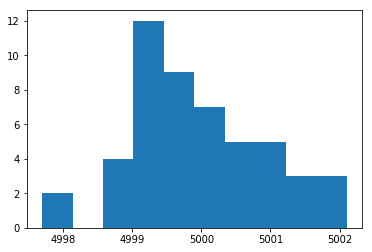

In [149]:
# histogram plot of a small sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = randn(50) + 100 *50

# histogram
pyplot.hist(data)
pyplot.show()

In [145]:
data

array([181.21726818,  69.41217932,  73.59141239,  46.35156889,
       143.27038147, -15.07693484, 187.24058821,  61.93965496,
       115.9519548 ,  87.53148123, 173.10539685,  -3.00703547,
        83.8791398 ,  80.79728227, 156.68847212,  45.00543663,
        91.37858962,  56.1070791 , 102.11068734, 129.14076069,
        44.96904114, 157.23618549, 145.07953603, 125.12471695,
       145.04279746,  65.81360704,  93.85548872,  53.21152829,
        86.60559602, 126.51777334,  65.41696241,  80.16232366,
        65.64136499,  57.73971793,  66.43769346,  99.36677005,
        44.13448257, 111.72078489, 182.99010886, 137.10220803,
        90.40822238,  55.6185518 ,  62.64208531, 184.62273005,
       102.54038774,  68.15021767, 109.54577423, 205.01275682,
       106.00794762, 130.86015549])

In [144]:
# Increasing the size of the sample from 50 to 100 can help to better expose the Gaussian shape of the data distribution

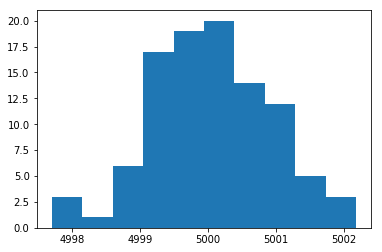

In [150]:
# histogram plot of a small sample
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = randn(100) + 100 *50
# histogram
pyplot.hist(data)
pyplot.show()

In [146]:
data

array([181.21726818,  69.41217932,  73.59141239,  46.35156889,
       143.27038147, -15.07693484, 187.24058821,  61.93965496,
       115.9519548 ,  87.53148123, 173.10539685,  -3.00703547,
        83.8791398 ,  80.79728227, 156.68847212,  45.00543663,
        91.37858962,  56.1070791 , 102.11068734, 129.14076069,
        44.96904114, 157.23618549, 145.07953603, 125.12471695,
       145.04279746,  65.81360704,  93.85548872,  53.21152829,
        86.60559602, 126.51777334,  65.41696241,  80.16232366,
        65.64136499,  57.73971793,  66.43769346,  99.36677005,
        44.13448257, 111.72078489, 182.99010886, 137.10220803,
        90.40822238,  55.6185518 ,  62.64208531, 184.62273005,
       102.54038774,  68.15021767, 109.54577423, 205.01275682,
       106.00794762, 130.86015549])